In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
from sklearn.preprocessing import MinMaxScaler

In [5]:
raw_df = pd.read_csv("../Stock_CSV/CTSH.csv")

In [6]:
raw_seq = raw_df["4. close"].tolist()

In [7]:
seq = [ele for ele in reversed(raw_seq)] 
seq = np.array(seq)


In [8]:
input_size = 1
num_steps = 30

In [9]:
seq = [np.array(seq[i * input_size: (i + 1) * input_size])
               for i in range(len(seq) // input_size)]

In [10]:
min_max_scaler = MinMaxScaler()
seq = MinMaxScaler().fit_transform(seq)

In [11]:
X = np.array([seq[i: i + num_steps] for i in range(len(seq) - num_steps)])
y = np.array([seq[i + num_steps] for i in range(len(seq) - num_steps)])


In [12]:
train_size = int(len(X)* (1-.1)) #saving 10% for test data
X_train,X_test = X[:train_size] , X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [13]:
X_train.shape
X_train = X_train.reshape((X_train.shape[0], -1), order='F')
X_train.shape

(4501, 30)

array([[0.69839675],
       [0.69399142],
       [0.69312439],
       [0.68960042],
       [0.68410068],
       [0.68778972],
       [0.68700229],
       [0.68796171],
       [0.68471212],
       [0.68650159],
       [0.68976763],
       [0.69506103],
       [0.70033597],
       [0.70110511],
       [0.6961283 ],
       [0.69797192],
       [0.70396517],
       [0.70419571],
       [0.7085246 ],
       [0.70060509],
       [0.70664778],
       [0.69902645],
       [0.68531936],
       [0.68629075],
       [0.67945334],
       [0.67455067],
       [0.67502963],
       [0.6760161 ],
       [0.67944033],
       [0.67949347],
       [0.67930371],
       [0.67245544],
       [0.67240295],
       [0.6663142 ],
       [0.66915034],
       [0.6675935 ],
       [0.66651486],
       [0.67455742],
       [0.67147318],
       [0.66314421],
       [0.66108799],
       [0.64741203],
       [0.64608064],
       [0.64972794],
       [0.65180791],
       [0.65259582],
       [0.65129923],
       [0.648

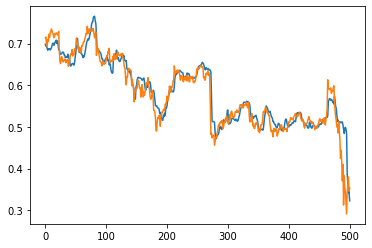

In [14]:
mdl = neighbors.KNeighborsRegressor(n_neighbors = 10, weights = "distance", algorithm = "auto")
mdl.fit(X_train, y_train)
pred = mdl.predict(X_test.reshape((X_test.shape[0], -1), order='F'))
plt.plot(pred)
plt.plot(y_test)
pred

In [15]:
#config
lstm_size = 128
num_layers = 1
leep_prob = .8
batch_size = 64
init_learning_rate = .001
learning_rate_decay = .99
init_epoch = 5
max_epoch = 50

In [16]:
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()

In [20]:
X_train = X_train.reshape((X_train.shape[0], -1), order='F')
mdl.fit(X_train, y_train)
X_test = X_test.reshape((X_test.shape[0], -1), order='F')


In [23]:
pred = mdl.predict(X_test[len(X_test)-60:])

array([[0.5100827 ],
       [0.50420669],
       [0.49746202],
       [0.49311455],
       [0.49723361],
       [0.50234328],
       [0.49648359],
       [0.5016399 ],
       [0.50393701],
       [0.50994356],
       [0.51601475],
       [0.51941602],
       [0.51359423],
       [0.5131399 ],
       [0.51684687],
       [0.51585357],
       [0.5084599 ],
       [0.51775813],
       [0.5208246 ],
       [0.51619719],
       [0.50451145],
       [0.51741344],
       [0.5263301 ],
       [0.54360379],
       [0.61149477],
       [0.59200189],
       [0.58992053],
       [0.58887934],
       [0.5905133 ],
       [0.59349526],
       [0.58124718],
       [0.58391625],
       [0.58468444],
       [0.59259505],
       [0.59809902],
       [0.56828391],
       [0.53854723],
       [0.52550105],
       [0.51303132],
       [0.50021287],
       [0.50531603],
       [0.4840678 ],
       [0.51394799],
       [0.48881805],
       [0.46945035],
       [0.42476537],
       [0.44417562],
       [0.416

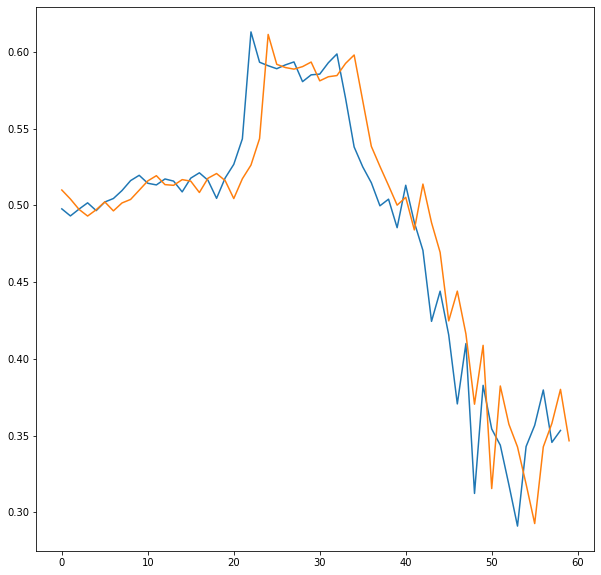

In [24]:
plt.figure(figsize = (10,10))
plt.plot(y_test[len(X_test)-59:])
plt.plot(pred)
pred

In [303]:
from sklearn.metrics import mean_squared_error as mse
mse(pred, y_test)

14.606239975329933

In [435]:
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import optimizers

In [468]:
#config
lstm_size = 128
num_layers = 1
leep_prob = .8
batch_size = 32
init_learning_rate = .001
learning_rate_decay = .99
init_epoch = 5
max_epoch = 50

In [469]:
lstm_model = Sequential()
lstm_model.add(LSTM(100, batch_input_shape=(batch_size, num_steps, X_train.shape[2]), dropout=0.0, recurrent_dropout=0.0, stateful=True,     kernel_initializer='random_uniform'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(20,activation='relu'))
lstm_model.add(Dense(1,activation='sigmoid'))
optimizer = optimizers.RMSprop()
lstm_model.compile(loss='mean_squared_error', optimizer=optimizer)

In [470]:
history = lstm_model.fit(X_train, y_train, epochs=max_epoch, verbose=2, batch_size=batch_size,shuffle=False)

ValueError: In a stateful network, you should only pass inputs with a number of samples that can be divided by the batch size. Found: 1743 samples

(1743, 30)

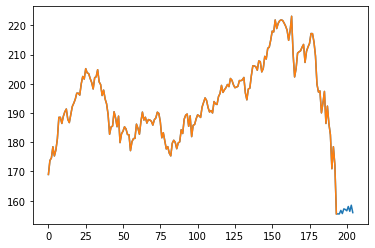

In [316]:

plt.plot(pred2)
plt.plot(pred)

